In [1]:
import pandas as pd

In [2]:
series = pd.Series(["BMW", "Toyota", "Honda"])

In [3]:
colors = pd.Series(['red', 'blue', 'green'])

In [4]:
series, colors

(0       BMW
 1    Toyota
 2     Honda
 dtype: object,
 0      red
 1     blue
 2    green
 dtype: object)

In [5]:
car_data = pd.DataFrame({"car make": series, "color": colors})

In [6]:
car_data

,car make,color
0,BMW,red
1,Toyota,blue
2,Honda,green


In [7]:
car_sales = pd.read_csv("../ztm-ml/data/car-sales.csv")

In [8]:
# Attributes
car_sales.dtypes


Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [9]:
# Functions
car_sales.describe()

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [10]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 532.0+ bytes


In [11]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [12]:
# loc refers to indexes
car_sales.loc[0]

Make                Toyota
Colour               White
Odometer (KM)       150043
Doors                    4
Price            $4,000.00
Name: 0, dtype: object

In [13]:
# .iloc refers to position
car_sales.iloc[0]

Make                Toyota
Colour               White
Odometer (KM)       150043
Doors                    4
Price            $4,000.00
Name: 0, dtype: object

In [14]:
car_sales["Price"] = car_sales["Price"].str.replace(
    "[\$\,]", "", regex=True
)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_6309/755964021.py:2: SyntaxWarning: invalid escape sequence '\$'
  "[\$\,]", "", regex=True


In [15]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.00
1,Honda,Red,87899,4,5000.00
2,Toyota,Blue,32549,3,7000.00
3,BMW,Black,11179,5,22000.00
4,Nissan,White,213095,4,3500.00
5,Toyota,Green,99213,4,4500.00
6,Honda,Blue,45698,4,7500.00
7,Honda,Blue,54738,4,7000.00
8,Toyota,White,60000,4,6250.00
9,Nissan,White,31600,4,9700.00


In [16]:
car_sales.groupby(['Make']).mean(numeric_only=True)

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


<Axes: >

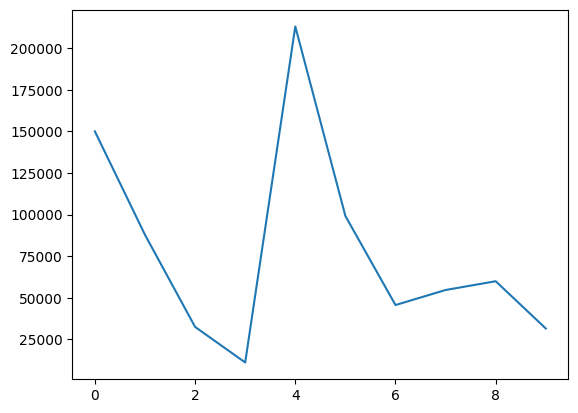

In [17]:
car_sales["Odometer (KM)"].plot()

<Axes: >

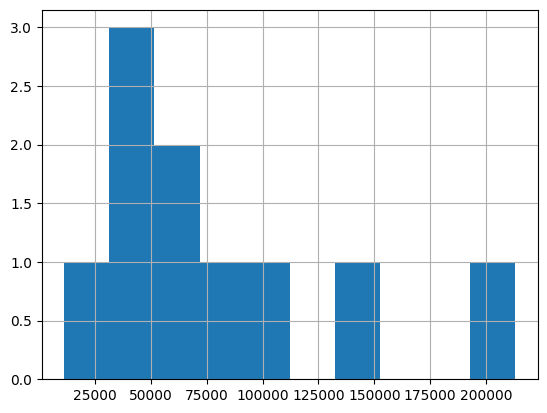

In [18]:
car_sales["Odometer (KM)"].hist()

In [19]:
# convert the dtype of Price to float
car_sales["Price"] = car_sales["Price"].str.replace("[\$\,\.]", "").astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_6309/1494450102.py:2: SyntaxWarning: invalid escape sequence '\$'
  car_sales["Price"] = car_sales["Price"].str.replace("[\$\,\.]", "").astype(float)


In [20]:
car_sales["Price"]

0     4000.0
1     5000.0
2     7000.0
3    22000.0
4     3500.0
5     4500.0
6     7500.0
7     7000.0
8     6250.0
9     9700.0
Name: Price, dtype: float64

In [21]:
# Manipulating Data

car_sales["Make"].str.lower()

0    toyota
1     honda
2    toyota
3       bmw
4    nissan
5    toyota
6     honda
7     honda
8    toyota
9    nissan
Name: Make, dtype: object

In [22]:
missing_df = pd.read_csv("../ztm-ml/data/car-sales-missing-data.csv")

In [23]:
# Different ways to use inplace=True properly

# Method 1: Use DataFrame.fillna() with column specification
# This is the recommended approach from the warning message
missing_df.fillna({"Odometer": missing_df["Odometer"].mean()}, inplace=True)

In [24]:
missing_df

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,NaN,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,NaN
8,Toyota,White,60000.000000,NaN,NaN
9,NaN,White,31600.000000,4.0,"$9,700"


In [25]:
seat_colums = pd.Series([5,5,5,5,5])

In [26]:
car_sales["seats"] = seat_colums

In [27]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,seats
0,Toyota,White,150043,4,4000.0,5.0
1,Honda,Red,87899,4,5000.0,5.0
2,Toyota,Blue,32549,3,7000.0,5.0
3,BMW,Black,11179,5,22000.0,5.0
4,Nissan,White,213095,4,3500.0,5.0
5,Toyota,Green,99213,4,4500.0,NaN
6,Honda,Blue,45698,4,7500.0,NaN
7,Honda,Blue,54738,4,7000.0,NaN
8,Toyota,White,60000,4,6250.0,NaN
9,Nissan,White,31600,4,9700.0,NaN


In [28]:
car_sales.fillna({'seats':5}, inplace=True)

In [29]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,seats
0,Toyota,White,150043,4,4000.0,5.0
1,Honda,Red,87899,4,5000.0,5.0
2,Toyota,Blue,32549,3,7000.0,5.0
3,BMW,Black,11179,5,22000.0,5.0
4,Nissan,White,213095,4,3500.0,5.0
5,Toyota,Green,99213,4,4500.0,5.0
6,Honda,Blue,45698,4,7500.0,5.0
7,Honda,Blue,54738,4,7000.0,5.0
8,Toyota,White,60000,4,6250.0,5.0
9,Nissan,White,31600,4,9700.0,5.0
